# Failed Bank Study 2008-2023 USA 

## Data source : FDIC open API , No key requires

API link- BankFind Suite: API for Data Miners & Developers (fdic.gov)

In [101]:
import requests
import pandas as pd

API_ENDPOINT = 'https://banks.data.fdic.gov/api/failures/'  

headers = {
    'Accept': 'application/json'

}

params = {
    'filters': 'FAILYR:["2008" TO "2023"]',
    'fields': 'NAME,CERT,FIN,CITYST,FAILDATE,SAVR,RESTYPE,RESTYPE1,QBFDEP,QBFASSET,COST',
    'limit': '600',
    'offset': '0',
    'format': 'json'
    
}

response = requests.get(API_ENDPOINT, headers=headers, params=params)

if response.status_code == 200:
    json_data = response.json()
    df = pd.json_normalize(json_data['data'])
    print(df)
else:
    print('Error:', response.status_code)


     score  data.QBFDEP   data.COST  data.QBFASSET data.FIN data.FAILDATE  \
0        0        50250      7157.0          52824    10003     1/25/2008   
1        0        13566      3800.0          18682    10004      3/7/2008   
2        0      1815691   1025837.0        1895545    10005      5/9/2008   
3        0        50178     10305.0          52916    10006     5/30/2008   
4        0     18941727  12040084.0       30698512    10007     7/11/2008   
..     ...          ...         ...            ...      ...           ...   
544      0       111234      1946.0         120574    10534     11/1/2019   
545      0        95159     25293.0         100879    10535     2/14/2020   
546      0       143102     45913.0         151808    10536      4/3/2020   
547      0       133936      7247.0         136566    10537    10/16/2020   
548      0        64941     16806.0          65733    10538    10/23/2020   

     data.CERT data.RESTYPE            data.CITYST data.SAVR data.RESTYPE1 

In [102]:
df.head(10)

,score,data.QBFDEP,data.COST,data.QBFASSET,data.FIN,data.FAILDATE,data.CERT,data.RESTYPE,data.CITYST,data.SAVR,data.RESTYPE1,data.NAME,data.ID
0,0,50250,7157.0,52824,10003,1/25/2008,24660,FAILURE,"KANSAS CITY, MO",DIF,PA,DOUGLASS NATIONAL BANK,3556
1,0,13566,3800.0,18682,10004,3/7/2008,1971,FAILURE,"HUME, MO",DIF,PI,HUME BANK,3557
2,0,1815691,1025837.0,1895545,10005,5/9/2008,33901,FAILURE,"BENTONVILLE, AR",DIF,PI,ANB FINANCIAL NATIONAL ASS...,3558
3,0,50178,10305.0,52916,10006,5/30/2008,12736,FAILURE,"STAPLES, MN",DIF,PA,"FIRST INTEGRITY BANK, N.A.",3559
4,0,18941727,12040084.0,30698512,10007,7/11/2008,29730,FAILURE,"PASADENA, CA",DIF,PI,INDYMAC BANK F.S.B,3560
5,0,3038053,714794.0,3411145,10008,7/25/2008,27011,FAILURE,"RENO, NV",DIF,PA,FIRST NATIONAL BANK OF NEVADA,3561
6,0,234812,92139.0,255376,10009,7/25/2008,57961,FAILURE,"NEWPORT BEACH, CA",DIF,PA,FIRST HERITAGE BANK N.A.,3562
7,0,226698,95555.0,258610,10010,8/1/2008,57523,FAILURE,"BRADENTON, FL",DIF,PI,FIRST PRIORITY BANK,3563
8,0,620354,334760.0,735071,10011,8/22/2008,22728,FAILURE,"TOPEKA, KS",DIF,PI,THE COLUMBIAN BANK AND TRU...,3564
9,0,962456,466681.0,1107514,10012,8/29/2008,35469,FAILURE,"ALPHARETTA, GA",DIF,PA,INTEGRITY BANK,3565


In [103]:
# printing columns list 

print(df.columns.tolist())

['score', 'data.QBFDEP', 'data.COST', 'data.QBFASSET', 'data.FIN', 'data.FAILDATE', 'data.CERT', 'data.RESTYPE', 'data.CITYST', 'data.SAVR', 'data.RESTYPE1', 'data.NAME', 'data.ID']


In [104]:
# finding data types 
df.dtypes

score              int64
data.QBFDEP        int64
data.COST        float64
data.QBFASSET      int64
data.FIN          object
data.FAILDATE     object
data.CERT          int64
data.RESTYPE      object
data.CITYST       object
data.SAVR         object
data.RESTYPE1     object
data.NAME         object
data.ID           object
dtype: object

In [105]:
"""" droping columns that are not relavent or not intend to include 
in analysis for now,I use data dictonary of FDIC
 to find the what the each column about """



df.drop(['score', 'data.ID', 'data.RESTYPE1', 'data.RESTYPE', 'data.FIN', 'data.CERT'], axis=1, inplace=True)


In [106]:
df.head()

,data.QBFDEP,data.COST,data.QBFASSET,data.FAILDATE,data.CITYST,data.SAVR,data.NAME
0,50250,7157.0,52824,1/25/2008,"KANSAS CITY, MO",DIF,DOUGLASS NATIONAL BANK
1,13566,3800.0,18682,3/7/2008,"HUME, MO",DIF,HUME BANK
2,1815691,1025837.0,1895545,5/9/2008,"BENTONVILLE, AR",DIF,ANB FINANCIAL NATIONAL ASS...
3,50178,10305.0,52916,5/30/2008,"STAPLES, MN",DIF,"FIRST INTEGRITY BANK, N.A."
4,18941727,12040084.0,30698512,7/11/2008,"PASADENA, CA",DIF,INDYMAC BANK F.S.B


#  1 Replace the headers 



In [107]:
df.rename(columns={
    'data.NAME': 'Bank Name',
    'data.QBFDEP': 'Total Deposits(USD/Thousands)',
    'data.QBFASSET': 'Total Assets(USD/Thousands)',
    'data.COST': 'Estimated Loss(USD/Thousands)',
    'data.FAILDATE': 'Closing Date',
    'data.SAVR': 'Insurance Fund'
}, inplace=True)


In [108]:
df.head()

,Total Deposits(USD/Thousands),Estimated Loss(USD/Thousands),Total Assets(USD/Thousands),Closing Date,data.CITYST,Insurance Fund,Bank Name
0,50250,7157.0,52824,1/25/2008,"KANSAS CITY, MO",DIF,DOUGLASS NATIONAL BANK
1,13566,3800.0,18682,3/7/2008,"HUME, MO",DIF,HUME BANK
2,1815691,1025837.0,1895545,5/9/2008,"BENTONVILLE, AR",DIF,ANB FINANCIAL NATIONAL ASS...
3,50178,10305.0,52916,5/30/2008,"STAPLES, MN",DIF,"FIRST INTEGRITY BANK, N.A."
4,18941727,12040084.0,30698512,7/11/2008,"PASADENA, CA",DIF,INDYMAC BANK F.S.B


In [109]:
df.rename(columns={'Total Deposits(USD/Thousands)': 'Deposits (USDK)', 'Total Assets(USD/Thousands)': 'Assets (USDK)', 'Estimated Loss(USD/Thousands)': 'Estimated Loss (USDK)'}, inplace=True)


In [110]:
df.head()

,Deposits (USDK),Estimated Loss (USDK),Assets (USDK),Closing Date,data.CITYST,Insurance Fund,Bank Name
0,50250,7157.0,52824,1/25/2008,"KANSAS CITY, MO",DIF,DOUGLASS NATIONAL BANK
1,13566,3800.0,18682,3/7/2008,"HUME, MO",DIF,HUME BANK
2,1815691,1025837.0,1895545,5/9/2008,"BENTONVILLE, AR",DIF,ANB FINANCIAL NATIONAL ASS...
3,50178,10305.0,52916,5/30/2008,"STAPLES, MN",DIF,"FIRST INTEGRITY BANK, N.A."
4,18941727,12040084.0,30698512,7/11/2008,"PASADENA, CA",DIF,INDYMAC BANK F.S.B


# 2 Format data into a more readable format

In [111]:
#  data.CITYST is splited into city and state to make more readable and 
# consistency in data with other sources as well

#df[['City', 'State']] = df['data.CITYST'].str.split(',', expand=True)


In [112]:


df[['City', 'State']] = df['data.CITYST'].str.split(', ', n=1, expand=True)


In [113]:
df.head()

,Deposits (USDK),Estimated Loss (USDK),Assets (USDK),Closing Date,data.CITYST,Insurance Fund,Bank Name,City,State
0,50250,7157.0,52824,1/25/2008,"KANSAS CITY, MO",DIF,DOUGLASS NATIONAL BANK,KANSAS CITY,MO
1,13566,3800.0,18682,3/7/2008,"HUME, MO",DIF,HUME BANK,HUME,MO
2,1815691,1025837.0,1895545,5/9/2008,"BENTONVILLE, AR",DIF,ANB FINANCIAL NATIONAL ASS...,BENTONVILLE,AR
3,50178,10305.0,52916,5/30/2008,"STAPLES, MN",DIF,"FIRST INTEGRITY BANK, N.A.",STAPLES,MN
4,18941727,12040084.0,30698512,7/11/2008,"PASADENA, CA",DIF,INDYMAC BANK F.S.B,PASADENA,CA


In [114]:
# droping data.CITYST , since we have ciyt and state two new cloumns
df = df.drop('data.CITYST', axis=1)


In [115]:
df.head()

,Deposits (USDK),Estimated Loss (USDK),Assets (USDK),Closing Date,Insurance Fund,Bank Name,City,State
0,50250,7157.0,52824,1/25/2008,DIF,DOUGLASS NATIONAL BANK,KANSAS CITY,MO
1,13566,3800.0,18682,3/7/2008,DIF,HUME BANK,HUME,MO
2,1815691,1025837.0,1895545,5/9/2008,DIF,ANB FINANCIAL NATIONAL ASS...,BENTONVILLE,AR
3,50178,10305.0,52916,5/30/2008,DIF,"FIRST INTEGRITY BANK, N.A.",STAPLES,MN
4,18941727,12040084.0,30698512,7/11/2008,DIF,INDYMAC BANK F.S.B,PASADENA,CA


In [123]:
# Rearrange the columns in the desired order
df = df[['Bank Name', 'State', 'City', 'Deposits (USDK)', 'Estimated Loss (USDK)', 'Assets (USDK)', 'Closing Date', 'Insurance Fund']]

# Display a sample of the DataFrame
df.head()

,Bank Name,State,City,Deposits (USDK),Estimated Loss (USDK),Assets (USDK),Closing Date,Insurance Fund
0,DOUGLASS NATIONAL BANK,MO,KANSAS CITY,50250,7157.0,52824,1/25/2008,DIF
1,HUME BANK,MO,HUME,13566,3800.0,18682,3/7/2008,DIF
2,ANB FINANCIAL NATIONAL ASS...,AR,BENTONVILLE,1815691,1025837.0,1895545,5/9/2008,DIF
3,"FIRST INTEGRITY BANK, N.A.",MN,STAPLES,50178,10305.0,52916,5/30/2008,DIF
4,INDYMAC BANK F.S.B,CA,PASADENA,18941727,12040084.0,30698512,7/11/2008,DIF


In [124]:
print(df)

                         Bank Name State               City  Deposits (USDK)  \
0           DOUGLASS NATIONAL BANK    MO        KANSAS CITY            50250   
1                        HUME BANK    MO               HUME            13566   
2    ANB FINANCIAL NATIONAL ASS...    AR        BENTONVILLE          1815691   
3       FIRST INTEGRITY BANK, N.A.    MN            STAPLES            50178   
4               INDYMAC BANK F.S.B    CA           PASADENA         18941727   
..                             ...   ...                ...              ...   
544  CITY NATIONAL BANK OF NEW ...    NJ             NEWARK           111234   
545             ERICSON STATE BANK    NE            ERICSON            95159   
546           THE FIRST STATE BANK    WV      BARBOURSVILLE           143102   
547     FIRST CITY BANK OF FLORIDA    FL  FORT WALTON BEACH           133936   
548              ALMENA STATE BANK    KS             ALMENA            64941   

     Estimated Loss (USDK)  Assets (USD

# 3 Identify outliers and bad data

#analyzing the box plots and scatter plots, we can visually identify potential #outliers and bad data points


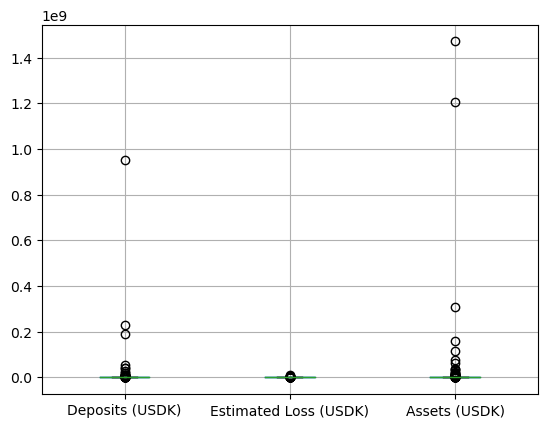

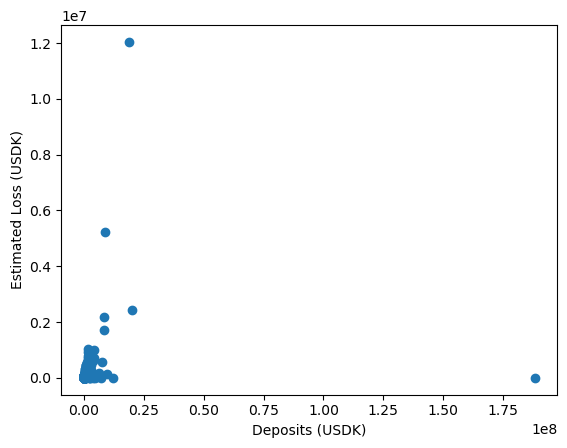

In [125]:
import pandas as pd
import matplotlib.pyplot as plt

# Assume your DataFrame is stored in the variable df

# Box plots
df.boxplot(column=['Deposits (USDK)', 'Estimated Loss (USDK)', 'Assets (USDK)'])
plt.show()

# Scatter plot
plt.scatter(df['Deposits (USDK)'], df['Estimated Loss (USDK)'])
plt.xlabel('Deposits (USDK)')
plt.ylabel('Estimated Loss (USDK)')
plt.show()


# 4 Find duplicates

To find duplicates in a DataFrame, we can use the duplicated() method in pandas


In [126]:
# Find duplicate rows
duplicate_rows = df[df.duplicated()]
print("Duplicate Rows:")
print(duplicate_rows)

# Find total number of duplicates
num_duplicates = df.duplicated().sum()
print(f"Total number of duplicates: {num_duplicates}")

Duplicate Rows:
Empty DataFrame
Columns: [Bank Name, State, City, Deposits (USDK), Estimated Loss (USDK), Assets (USDK), Closing Date, Insurance Fund]
Index: []
Total number of duplicates: 0


# 5 Fix casing or inconsistent values

To fix the casing (capitalization) of strings in a DataFrame column, we can use the str.title() or str.capitalize() methods in pandas

In [127]:
# Fix casing of a single column
df['Bank Name'] = df['Bank Name'].str.title()

# Fix casing of multiple columns
columns_to_fix = ['Bank Name', 'City', 'State']
df[columns_to_fix] = df[columns_to_fix].apply(lambda x: x.str.title())

# Display the updated DataFrame
print(df)

                         Bank Name State               City  Deposits (USDK)  \
0           Douglass National Bank    Mo        Kansas City            50250   
1                        Hume Bank    Mo               Hume            13566   
2    Anb Financial National Ass...    Ar        Bentonville          1815691   
3       First Integrity Bank, N.A.    Mn            Staples            50178   
4               Indymac Bank F.S.B    Ca           Pasadena         18941727   
..                             ...   ...                ...              ...   
544  City National Bank Of New ...    Nj             Newark           111234   
545             Ericson State Bank    Ne            Ericson            95159   
546           The First State Bank    Wv      Barboursville           143102   
547     First City Bank Of Florida    Fl  Fort Walton Beach           133936   
548              Almena State Bank    Ks             Almena            64941   

     Estimated Loss (USDK)  Assets (USD

In [128]:
df.head()

,Bank Name,State,City,Deposits (USDK),Estimated Loss (USDK),Assets (USDK),Closing Date,Insurance Fund
0,Douglass National Bank,Mo,Kansas City,50250,7157.0,52824,1/25/2008,DIF
1,Hume Bank,Mo,Hume,13566,3800.0,18682,3/7/2008,DIF
2,Anb Financial National Ass...,Ar,Bentonville,1815691,1025837.0,1895545,5/9/2008,DIF
3,"First Integrity Bank, N.A.",Mn,Staples,50178,10305.0,52916,5/30/2008,DIF
4,Indymac Bank F.S.B,Ca,Pasadena,18941727,12040084.0,30698512,7/11/2008,DIF


# 6 Changing date in object type into datetime 

In [129]:
# Convert "Closing Date" column to datetime
df['Closing Date'] = pd.to_datetime(df['Closing Date'], format='%m/%d/%Y')

# Display the updated DataFrame
print(df)

                         Bank Name State               City  Deposits (USDK)  \
0           Douglass National Bank    Mo        Kansas City            50250   
1                        Hume Bank    Mo               Hume            13566   
2    Anb Financial National Ass...    Ar        Bentonville          1815691   
3       First Integrity Bank, N.A.    Mn            Staples            50178   
4               Indymac Bank F.S.B    Ca           Pasadena         18941727   
..                             ...   ...                ...              ...   
544  City National Bank Of New ...    Nj             Newark           111234   
545             Ericson State Bank    Ne            Ericson            95159   
546           The First State Bank    Wv      Barboursville           143102   
547     First City Bank Of Florida    Fl  Fort Walton Beach           133936   
548              Almena State Bank    Ks             Almena            64941   

     Estimated Loss (USDK)  Assets (USD

In [130]:
df.dtypes

Bank Name                        object
State                            object
City                             object
Deposits (USDK)                   int64
Estimated Loss (USDK)           float64
Assets (USDK)                     int64
Closing Date             datetime64[ns]
Insurance Fund                   object
dtype: object

# 7 Changing USDK object type into numeric type 

In [131]:
numeric_columns = ['Deposits (USDK)', 'Estimated Loss (USDK)', 'Assets (USDK)']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Check the updated data types
print(df.dtypes)

Bank Name                        object
State                            object
City                             object
Deposits (USDK)                   int64
Estimated Loss (USDK)           float64
Assets (USDK)                     int64
Closing Date             datetime64[ns]
Insurance Fund                   object
dtype: object
